# Assignment 2 Notebook #

This notebook focuses on looking at the relationship between global video game sales (number of copies sold, in millions) and other variables.

Dataset source: https://data.world/sumitrock/video-games-sales

In [28]:
## IMPORT CELL ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score
car_df = pd.read_csv("data/cars.csv")
from scipy import stats
from collections import Counter

In [2]:
#Show max 100 columns or rows
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
#Dont use scientific notation for numbers (e.g 1.003767687e-12)
pd.set_option('display.float_format','{:.5f}'.format)
np.set_printoptions(suppress=True)

## QUESTION 1 ##

### Cleaning up the dataset ###

Firstly, we should load the dataset into the notebook.

In [3]:
#Load in the CSV
df = pd.read_csv("data/Video_Games.csv")

In [4]:
#Look at the columns
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

There are a few rows in our dataset that have empty values, most importantly being the critic and user scores as well as the user counts. If the dataset is left the way it is, any analysis would have distorted results. As such, the dataset will need to be cleaned up.

In [5]:
#Use dropna() to remove all rows with empty values in 
df = df.dropna()
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.00000,Sports,Nintendo,41.36000,28.96000,3.77000,8.45000,82.53000,76.00000,51.00000,8,322.00000,Nintendo,E
2,Mario Kart Wii,Wii,2008.00000,Racing,Nintendo,15.68000,12.76000,3.79000,3.29000,35.52000,82.00000,73.00000,8.3,709.00000,Nintendo,E
3,Wii Sports Resort,Wii,2009.00000,Sports,Nintendo,15.61000,10.93000,3.28000,2.95000,32.77000,80.00000,73.00000,8,192.00000,Nintendo,E
6,New Super Mario Bros.,DS,2006.00000,Platform,Nintendo,11.28000,9.14000,6.50000,2.88000,29.80000,89.00000,65.00000,8.5,431.00000,Nintendo,E
7,Wii Play,Wii,2006.00000,Misc,Nintendo,13.96000,9.18000,2.93000,2.84000,28.92000,58.00000,41.00000,6.6,129.00000,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.00000,Action,NewKidCo,0.01000,0.00000,0.00000,0.00000,0.01000,46.00000,4.00000,2.4,21.00000,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.00000,Fighting,Midway Games,0.01000,0.00000,0.00000,0.00000,0.01000,81.00000,12.00000,8.8,9.00000,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.00000,Action,Konami Digital Entertainment,0.00000,0.01000,0.00000,0.00000,0.01000,80.00000,20.00000,7.6,412.00000,Kojima Productions,M
16700,Breach,PC,2011.00000,Shooter,Destineer,0.01000,0.00000,0.00000,0.00000,0.01000,61.00000,12.00000,5.8,43.00000,Atomic Games,T


In [6]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

Having checked the data types of each column using dtype, most of the essential columns are already in the suitable format (i.e they are already numeric data). Therefore they do not need to be editted further; only the user scores will need to be converted to numeric format. However, for the sake of clarity, the Year of Release column should ideally have the year as an integar and not a float.

In [7]:
df['Year_of_Release'] = df['Year_of_Release'].astype(int)
df['User_Score'] = pd.to_numeric(df['User_Score'])
df.dtypes

Name                object
Platform            object
Year_of_Release      int32
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

In [8]:
#Check final edit of dataset
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36000,28.96000,3.77000,8.45000,82.53000,76.00000,51.00000,8.00000,322.00000,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68000,12.76000,3.79000,3.29000,35.52000,82.00000,73.00000,8.30000,709.00000,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61000,10.93000,3.28000,2.95000,32.77000,80.00000,73.00000,8.00000,192.00000,Nintendo,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28000,9.14000,6.50000,2.88000,29.80000,89.00000,65.00000,8.50000,431.00000,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96000,9.18000,2.93000,2.84000,28.92000,58.00000,41.00000,6.60000,129.00000,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001,Action,NewKidCo,0.01000,0.00000,0.00000,0.00000,0.01000,46.00000,4.00000,2.40000,21.00000,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002,Fighting,Midway Games,0.01000,0.00000,0.00000,0.00000,0.01000,81.00000,12.00000,8.80000,9.00000,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,Konami Digital Entertainment,0.00000,0.01000,0.00000,0.00000,0.01000,80.00000,20.00000,7.60000,412.00000,Kojima Productions,M
16700,Breach,PC,2011,Shooter,Destineer,0.01000,0.00000,0.00000,0.00000,0.01000,61.00000,12.00000,5.80000,43.00000,Atomic Games,T


The two variables that I am concentrating on are the **global sales** of the games (the dependant variable) and the games' **user scores** (the independent variable). 

### Global Sales Statistics ###

In [9]:
#Firstly let's look at the global sales averages.

#mean
gs_mean=df["Global_Sales"].mean()
print(gs_mean)
#median
gs_median=df["Global_Sales"].median()
print(gs_median)
#Mode
gs_mode = Counter(df["Global_Sales"]).most_common(1)[0][0]
print(gs_mode)

0.7775897435897436
0.29
0.02


The mean of the global sales is approximately 777,590; which could tell us that the average game is able to sell 777,590 copies. Unfortunately, there are many games in the dataset that have very low global sales (that being under a million units sold) while only about 0.59% of the sales going above 10 million. The outliers make the data heavily skewed which makes our mean unrealiable.

On the other hand, the median of global sales is 290,000 units and the mode is approximately 20,000 units. As the median and mode are not affected by outliers, they give us a more accurate picture of the game sales. We can either conclude that most games are able to sell 20,000 units worldwide or that the middle sales value for a game is 290,000 units globaly. 

All in all, according to the data in dataset, an average game is expected to sell under a million units globally.

In [10]:
#Calculating the percentage of large global sales.
sales=df["Global_Sales"].to_numpy()
o10=[]
for num in sales:
    if num > 10:
        o10.append(num)
#print(o10)

#percentage
(len(o10)/6825)*100

0.5860805860805861

In [11]:
#Looking at the spread of the global sales.

#range
range_gs=df["Global_Sales"].max() - df["Global_Sales"].min()
print(range_gs)

#standard deviation
std_gs=df['Global_Sales'].std()
print(std_gs)

82.52
1.9634427922327704


Looking at the spread statistics, the global sales has a very large range (about 82,520,000) but the standard deviation is rather small (approx. 2). This means that the global sales data is not very spread out.

<AxesSubplot: ylabel='Density'>

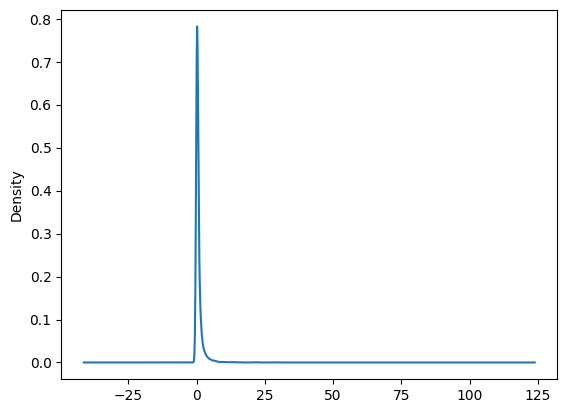

In [12]:
#plot distribution of global sales
df['Global_Sales'].plot(kind='kde')

The kernel density estimate of the global sales column shows that there is a very high peak at the beginning of the data, which quickly trails off and flatlines as we go through the column. We can conclude that the distribution of the global sales of video games is skewed to the right.

### User Score Statistics ###

In [13]:
#Now, let's look at the user score averages.

#mean
us_mean=df["User_Score"].mean()
print(us_mean)
#median
us_median=df["User_Score"].median()
print(us_median)
#Mode
us_mode = Counter(df["User_Score"]).most_common(1)[0][0]
print(us_mode)

7.185626373626373
7.5
7.8


Looking at the user score statistics, we see that the mean, median and mode are all about the same. The mean user score is 7.2, whereas the median and mode are 7.5 and 7.8 respectively. Although the mean is a little lower that the median and mode, we can confidently conclude that the average game is expected to get a user score in the range of 7 to 8 (out of 10).

In [14]:
#Looking at the spread of the user scores.

#range
range_us=df["User_Score"].max() - df["User_Score"].min()
print(range_us)

#standard deviation
std_us=df['User_Score'].std()
print(std_us)

9.1
1.439941664429381


The user score range is very high however, just like the global sales, the standard deviation is relatively small (about 1.4). The user scores are, therefore, not spread out.

<AxesSubplot: ylabel='Frequency'>

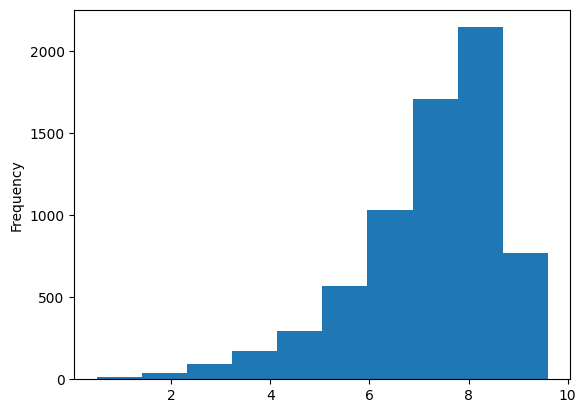

In [15]:
#plot distribution of user scores
df['User_Score'].plot(kind='hist')

The histogram of the user scores shows that most of the games' user scores are at the high end of the spectrum. It is safe to say that the user score distribution is skewed to the left. Although, the intensity of the skew is nowhere near as strong as that of the global sales.

## QUESTION 2: CORRELATION ##

To see how the global sales and user scores are related, we can use a scatterplot to see the correlation.

In [16]:
#To build the scatterplot, first we can extract the columns into numpy arrays
userscores=df["User_Score"].to_numpy()
#We already did this for global sales so we can just do the user scores here.

Text(0.5, 0, 'User Scores')

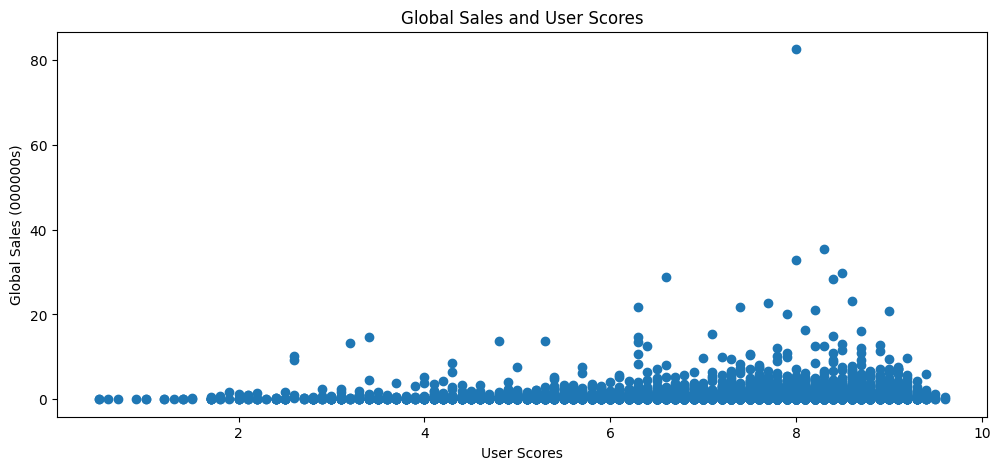

In [17]:
#Plot a scatterplot
fig, ax = plt.subplots(figsize=(12,5))
plt.title('Global Sales and User Scores')
ax.scatter(userscores,sales)
ax.set_ylabel('Global Sales (000000s)')
ax.set_xlabel('User Scores')

We can also numerically represent the correlation between the two variables by calculating the **Pearson's Coefficient**. It ranges between -1 and 1: 1 being a strong positive correlation, -1 being a strong negative correlation and 0 being no correlation between the variables. 

In [18]:
#Let's look at the Pearson's Coefficient

pearsons_coeff, p = stats.pearsonr(userscores, sales)
pearsons_coeff

0.08834852634696777

Having created a scatterplot, the illustration is not as clear as I would have hoped. Most of the points are clustered together at the bottom - **however** we can still get some information. The clustering of points grow as the user score increases, with the outlier point being at the high tail-end of the user scores, so, we could say that there is some sort of positive correlation between the user score and the global sales of a game. The games with higher user scores seem to have higher global sales.

As the scatterplot was not very clear, I decided to also calculate the Pearson's correlation coefficient, in which the result was approximately 0.088. This tells us that although the correlation is positive, it is a very weak correlation (since it's still quite close to 0). This seems quite accurate in a sense; although it is normal for highly rated games to have large sales, there are cases where a game sells well but has bad customer ratings or it has very high user ratings but did not do well internationally.

All in all, both global sales and user scores are indications of how well a game performs but they are not strongly related with each other.

## QUESTION 3 : LINEAR REGRESSION ##

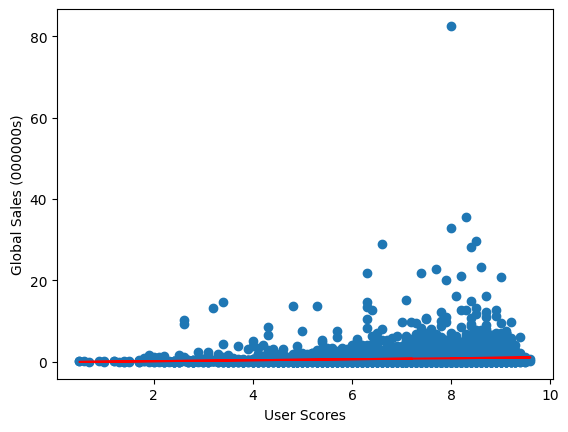

In [19]:
#Fit a data into a simple linear regression

x = userscores
y = sales

slope, intercept, r, p, std_err = stats.linregress(x, y)
slope = np.float32(slope)
model_y = [slope * i + intercept for i in x]

plt.scatter(userscores,sales)
plt.ylabel('Global Sales (000000s)')
plt.xlabel('User Scores')

plt.plot(x, model_y, 'r')

In [20]:
# Interpretation of the model

print("The intercept of the model is", intercept)

print("The slope of the model is", slope)

print("R^2 (coefficient of determination) is", r)

print("The p-value is", p)

The intercept of the model is -0.08805021477412112
The slope of the model is 0.12046827
R^2 (coefficient of determination) is 0.08834852634696726
The p-value is 2.63685512322317e-13


From the regression we get the following formula for our model:
```Global_Sales = 0.120*User_Scores - 0.088 (+ error) ```

Looking at the model against the scatterplot, it's obvious that the line goes in the same direction as the data. However, almost all the points are beyond the line (both above and below). In addition, the slope is very small, which does not really allow us to predict how many copies a game with a certain user score can sell. At best, we can look at the model formula and say: starting at -0.088, for every 1 point increase in a game's user score, we can expect an addition 120,000 copies sold worldwide.

In regards to the fit of the model, the R-squared is approxiamtely 0.088 (quite close to 0) which means that the model cannot really explain the variation in global sales (maybe, at best, 10% of the variation). In general, the model is not a good fit for the data.

Testing to see the relationship between the two variables, we can use the p-value. Our hypothesis test is as follows:

```H0: m(the slope) = 0 (i.e there is no relationship between variables)```

```H1: m(the slope) =/= 0 (i.e there is a relationship between variables)```

Our p-value is 2.63e-13. Our p-value is well below 0.05 which means that we reject the null hypothesis. As such, we can still conclude that there is a realtionship between a game's user score and its global sales.

## QUESTION 4 : NEW VARIABLE AND MULTIPLE REGRESSION ##

From the linear regression, it is clear that using user scores is not enough to explain the variation in global game sales. We could try doing a multiple regression model with some additional variables to see if we get better results.

For this regression, I will still use the **user scores** variable but I will also add the following variables to my regression: **NA game sales** (since the US is the biggest market in the industry it makes sense to add this), **critic scores** of the games and the **ratings** of the games.

For the ratings, we will need to convert the variables into dummy variables so that we can include them in the model.

In [21]:
#Let us check how many types of ratings there are in this dataset.

df["Rating"].unique()

#AO --> Adults only(18+)
#E --> Everyone
#E10+ --> Everyone ages 10 and over
#K-A --> Was used in place of E until 1998, may be excluded from dataframe
#M --> Mature (17+)
#RP --> Rating pending
#T --> Teen

array(['E', 'M', 'T', 'E10+', 'AO', 'K-A', 'RP'], dtype=object)

In [41]:
#Now that we know how many ratings there are, we can convert them into dummy variables

#Get the dummies and store it in a variable
dummy = pd.get_dummies(df["Rating"])
 
#Concatenate the dummies to original dataframe
merged_df = pd.concat([df, dummy], axis='columns')

#Format the critic scores so that they are in the same scale as the user scores
merged_df['Critic_Score']=merged_df['Critic_Score']/10

#Drop the ratings column from the new dataframe to avoid any confusion
merged_df.drop(['Rating','K-A'], axis=1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,AO,E,E10+,M,RP,T
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36000,28.96000,3.77000,8.45000,82.53000,7.60000,51.00000,8.00000,322.00000,Nintendo,0,1,0,0,0,0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68000,12.76000,3.79000,3.29000,35.52000,8.20000,73.00000,8.30000,709.00000,Nintendo,0,1,0,0,0,0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61000,10.93000,3.28000,2.95000,32.77000,8.00000,73.00000,8.00000,192.00000,Nintendo,0,1,0,0,0,0
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28000,9.14000,6.50000,2.88000,29.80000,8.90000,65.00000,8.50000,431.00000,Nintendo,0,1,0,0,0,0
7,Wii Play,Wii,2006,Misc,Nintendo,13.96000,9.18000,2.93000,2.84000,28.92000,5.80000,41.00000,6.60000,129.00000,Nintendo,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001,Action,NewKidCo,0.01000,0.00000,0.00000,0.00000,0.01000,4.60000,4.00000,2.40000,21.00000,Fluid Studios,0,1,0,0,0,0
16677,Mortal Kombat: Deadly Alliance,GBA,2002,Fighting,Midway Games,0.01000,0.00000,0.00000,0.00000,0.01000,8.10000,12.00000,8.80000,9.00000,Criterion Games,0,0,0,1,0,0
16696,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,Konami Digital Entertainment,0.00000,0.01000,0.00000,0.00000,0.01000,8.00000,20.00000,7.60000,412.00000,Kojima Productions,0,0,0,1,0,0
16700,Breach,PC,2011,Shooter,Destineer,0.01000,0.00000,0.00000,0.00000,0.01000,6.10000,12.00000,5.80000,43.00000,Atomic Games,0,0,0,0,0,1


Now that we have gotten our new dataframe, we can now create and fit the model.

In [46]:
#Seperate the independent and dependent variables from the new dataframe
x = merged_df[['NA_Sales', 'Critic_Score','User_Score',
               'AO','E','E10+','M','RP','T']]
y = merged_df['Global_Sales']

#Fit the regression model
regress = linear_model.LinearRegression()
regress.fit(x, y) 
print(regress.coef_, regress.intercept_,regress.score(x, y))

#Also display the adjusted R-squared
#Code adapted from https://www.statology.org/adjusted-r-squared-in-python/
adjusted_R2= 1 - (1-regress.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1)
print(adjusted_R2)

[ 1.93218728  0.02380032 -0.00464067 -1.89899851 -1.34190069 -1.37638169
 -1.35304974 -1.32139479 -1.34970254] 1.23300934701897 0.9138744637817349
0.9137607249958266


The formula for our model is as follows:

```Global_Sales = 1.932*NA_Sales + 0.024*Critic_Score - 0.005*User_Score - 1.899*AO - 1.342*E -1.376*E10+ -1.353*M - 1.321*RP - 1.350*T + 1.233```

As this is a multiple linear regression, we can get quite a lot of information from the variables, for example:
 - the intercept is 1.233, so the average global sales expected for a game is about 1,233,000 units
 - for every 1 unit sold in North America, the game will sell 1,932,000 additional copies globally
 - a 1 point increase of the critic score means that the game sells 24,000 more copies globally, **on the other hand**, a similar change in the user score will cause the the game to sell 5000 [less] copies globally.
 
Looking at the dummy variables, it seems that different ratings have varying results on the global sales. For instance, AO has the smallest coeffient out of all the dummy variables, so we can say that, on average, a game rated 18+ is going to sell 1,899,000 less copies globally than if it was rated otherwise. The rating (RP games cannot be sold until a rating is confirmed) that has the lowest impact on reducing global sales is E (for everyone), which does coincide with reality: games with a wider audience tend to sell better. 

Both the R-squared and adjusted R-squared are approximately 0.9, so we can conclude that the model can explain about 90% of the variation in global sales. This means that the model fits the data very well.

In [47]:
#Testing the predictions

#Game that is well received by both parties and sells well in NA and is rated E
g1=regress.predict([[25,8.5,9,0,1,0,0,0,0]])

#Game that is well received by critics but panned by users,
#doesn't sells well in NA and is rated T
g2=regress.predict([[1,8.9,3.4,0,0,0,0,0,1]])

#Game that is well received by users but panned by critics,
#doesn't sells well in NA and is rated T
g3=regress.predict([[1,3.4,8.9,0,0,0,0,0,1]])

#Game that is panned by critics and users,sells well in NA and is rated M
g4=regress.predict([[20,2,1,0,0,0,1,0,0]])

#Upcoming game that is well received by critics
#and projected to do well in NA and is unrated currently
g5=regress.predict([[10,6.4,0,0,0,0,0,1,0]])

print(g1,g2,g3,g4,g5)

[48.35632733] [2.01153864] [1.8551132] [38.56666518] [19.38580939]


C:\Users\tcelu\miniconda3\envs\introds\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\tcelu\miniconda3\envs\introds\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\tcelu\miniconda3\envs\introds\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\tcelu\miniconda3\envs\introds\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\tcelu\miniconda3\envs\introds\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## QUESTION 5: ETHICS ##

In regards to the gaming industry, using models such as this one to predict unit sales may lead to a number of issues. For example, although North America accounts for the majority of the market, there are other markets that are also very influential such Europe and Asia (particularly Japan) while other markets (e.g. Africa) are not explicitly considered. This makes it easy for gaming companies to cater exclusively to North American gamers (which may push a western attitude onto markets that very much don't want it). In addition, seeing how the critic score carries more weight than the user score, this could also cause gaming companies to disregard the views of the consumer and cater to the ideologies and interest of the critics - which will end up being counterproductive as gamers and critics tend to be very split. Finally, models like this could also cause a saturation in the market, if a particular rating gets a game more sales, then companies will try to make more of these sort of games: this excludes certain audiences and limits freedom of expression and creativity (since certain ratings prevent certain themes and imagery from being included).

There is a suprising lack of monetary consideration included in the model, I believe that taking into consideration the cost of making the game as well as the total cost of advertising could improve the performance of the model (or at least give us some interesting insights). Another variable that should be included could be the number of years it takes for the game to be developed or, whether or not it had to be delayed.